In [1]:
import os
os.chdir(r'C:\Users\82107\Desktop\Study\ML learning')
print('current directory:', os.getcwd())

current directory: C:\Users\82107\Desktop\Study\ML learning


In [6]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import layers
# 행렬을 다루기 위한 모듈을 불러온다.
import numpy as np 
# plot을 그리기 위한 모듈을 불러온다.
import matplotlib.pyplot as plt
# sklearn으로부터 데이터를 불러온다.
import sklearn
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston')

x_data, y_data = boston.data, boston.target
# data scaling
x_data = sklearn.preprocessing.scale(x_data, axis=0)    #표준화를 진행해줌
x_data.shape

c:\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(506, 13)

In [7]:
y_data.shape

(506,)

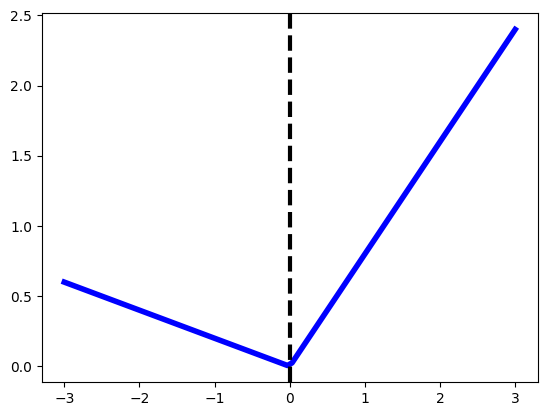

In [10]:
# check function
tau = 0.8
t = np.linspace(-3, 3, num=100, endpoint=True)
plt.plot(t, np.max((tau*t, (tau-1)*t), axis=0), '-', color='blue', linewidth=4)
plt.axvline(x=0, linestyle='--', c='black', linewidth=3)

In [11]:
# 분위수 값 설정
tau = 0.2
input_layer = layers.Input((x_data.shape[1]))
dense_layer1 = layers.Dense(5, activation='sigmoid')
x = dense_layer1(input_layer)
dense_layer2 = layers.Dense(1, activation='linear')
x = dense_layer2(x)

model = K.models.Model(input_layer, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 5)                 70        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
optimizer = K.optimizers.SGD(learning_rate=0.5)

def quantile_loss(q, y, y_pred):
    r = y - y_pred
    l = tf.reduce_mean(tf.maximum(tau*r, (tau-1)*r), axis=0, keepdims=False)
    return l

epochs = 500
batch_size = 128
for epoch in range(epochs):
    idx = np.random.randint(0, len(y_data), batch_size)
    x_batch = tf.cast(x_data[idx, :], tf.float32)
    y_batch = tf.cast(np.array(y_data[idx])[:, np.newaxis], tf.float32)
    
    with tf.GradientTape() as tape:
        y_hat = model(x_batch)
        loss = quantile_loss(tau, y_batch, y_hat)
    
    grad = tape.gradient(loss, model.weights)   #current solution을 받아오고 loss를 이용하여 gradient를 계산하고 그 gradient를 저장함
    optimizer.apply_gradients(zip(grad, model.weights)) #gradient를 model weight에 반영해줌
    
    if epoch % 10 == 0:
        print('({} epoch: loss: {:.6})'.format(epoch, loss.numpy()[0]))

(0 epoch: loss: 4.54684)
(10 epoch: loss: 4.03094)
(20 epoch: loss: 3.50634)
(30 epoch: loss: 3.14204)
(40 epoch: loss: 2.5423)
(50 epoch: loss: 1.98785)
(60 epoch: loss: 1.48345)
(70 epoch: loss: 1.13893)
(80 epoch: loss: 1.10319)
(90 epoch: loss: 1.26733)
(100 epoch: loss: 1.20167)
(110 epoch: loss: 0.857206)
(120 epoch: loss: 0.938108)
(130 epoch: loss: 1.10317)
(140 epoch: loss: 0.908184)
(150 epoch: loss: 0.843724)
(160 epoch: loss: 1.08836)
(170 epoch: loss: 0.84798)
(180 epoch: loss: 1.20616)
(190 epoch: loss: 0.991467)
(200 epoch: loss: 1.15939)
(210 epoch: loss: 0.838558)
(220 epoch: loss: 0.946781)
(230 epoch: loss: 0.819768)
(240 epoch: loss: 0.861336)
(250 epoch: loss: 0.833803)
(260 epoch: loss: 0.947504)
(270 epoch: loss: 0.929165)
(280 epoch: loss: 0.911293)
(290 epoch: loss: 0.945565)
(300 epoch: loss: 0.978924)
(310 epoch: loss: 0.734899)
(320 epoch: loss: 0.732095)
(330 epoch: loss: 1.05862)
(340 epoch: loss: 0.700701)
(350 epoch: loss: 0.821317)
(360 epoch: loss: 0.8